In [3]:
import pickle
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [38]:
font_location = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
fm.FontProperties(fname=font_location)
mpl.rc('font', family=font_name)

NanumGothic


### Load whole pickle data

In [4]:
with open('total_merged_data_1108.txt', 'rb') as f:
    whole_data = pickle.load(f)

In [8]:
whole_data = whole_data.drop_duplicates()

In [19]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977228 entries, 0 to 1083757
Data columns (total 54 columns):
deal_price           977228 non-null int64
deal_year            977228 non-null int64
deal_month           977228 non-null int64
full_loc_code        977228 non-null object
loc_code_x           977228 non-null object
gu_list              977228 non-null object
law_code             977228 non-null object
dong                 977228 non-null object
ji_bun               977228 non-null object
apt_name_y           977228 non-null object
area                 977228 non-null float64
current_floor        977228 non-null int64
build_y              977228 non-null int64
total_unit           977228 non-null float64
total_building       977228 non-null float64
max_floor            977228 non-null float64
min_floor            977228 non-null float64
total_parking        977228 non-null float64
unit_parking         977228 non-null float64
completed_date       977228 non-null object
conv_l

In [59]:
whole_data.columns.values

array(['deal_price', 'deal_year', 'deal_month', 'full_loc_code',
       'loc_code_x', 'gu_list', 'law_code', 'dong', 'ji_bun',
       'apt_name_y', 'area', 'current_floor', 'build_y', 'total_unit',
       'total_building', 'max_floor', 'min_floor', 'total_parking',
       'unit_parking', 'completed_date', 'conv_lists', 'medi_lists',
       'park_lists', 'road_lists', 'kindergarten', 'elementary_school',
       'middle_school', 'high_school', 'university', 'etc_lists',
       'S-Line1', 'S-Line2', 'S-Line3', 'S-Line4', 'S-Line5', 'S-Line6',
       'S-Line7', 'S-Line8', 'S-Line9', 'S-LineBD', 'S-LineNBD',
       'S-LineGC', 'S-LineJA', 'S-LineIC', 'S-LineAir', 'distance',
       'avg_price', 'full_addr', 'apt_jibun', 'cont_rank', 'com_year',
       'com_mon', 'bldg_age', 'lv_fg', 'full_deal_date'], dtype=object)

In [44]:
whole_data.loc[:, "full_deal_date"] = whole_data['deal_year'].astype(str) +"/" + whole_data['deal_month'].astype(str).apply(lambda x: x.zfill(2)) +"/01"

whole_data.loc[:, "full_deal_date"] = whole_data.full_deal_date.astype('datetime64[ns]')


/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [61]:
col_names = ['S-Line1', 'S-Line2', 'S-Line3', 'S-Line4', 'S-Line5', 'S-Line6','S-Line7', 'S-Line8', 'S-Line9', 'S-LineBD', 'S-LineNBD','S-LineGC', 'S-LineJA', 'S-LineIC', 'S-LineAir']

for line in col_names:
    cond = whole_data[line].isnull()
    column_name = line
    whole_data.loc[cond, column_name] = 0

/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [62]:
whole_data[col_names] = whole_data[col_names].astype(int)

/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [63]:
whole_data.head()

,deal_price,deal_year,deal_month,full_loc_code,loc_code_x,gu_list,law_code,dong,ji_bun,apt_name_y,...,distance,avg_price,full_addr,apt_jibun,cont_rank,com_year,com_mon,bldg_age,lv_fg,full_deal_date
0,29500,2006,1,1111019,11110,종로구,당주동,19,100,세종,...,582.0,315.845824,서울특별시 종로구 당주동 100,서울특별시 종로구 당주동 100,NaN,1983,06,23,4.0,2006-01-01
1,28000,2006,4,1111019,11110,종로구,당주동,19,100,세종,...,582.0,267.354149,서울특별시 종로구 당주동 100,서울특별시 종로구 당주동 100,NaN,1983,06,23,7.0,2006-04-01
2,64560,2006,9,1111019,11110,종로구,당주동,19,100,세종,...,582.0,411.892306,서울특별시 종로구 당주동 100,서울특별시 종로구 당주동 100,NaN,1983,06,23,1.0,2006-09-01
3,17000,2006,11,1111019,11110,종로구,당주동,19,100,세종,...,582.0,185.427574,서울특별시 종로구 당주동 100,서울특별시 종로구 당주동 100,NaN,1983,06,23,6.0,2006-11-01
4,43200,2007,1,1111019,11110,종로구,당주동,19,100,세종,...,582.0,411.154468,서울특별시 종로구 당주동 100,서울특별시 종로구 당주동 100,NaN,1983,06,24,3.0,2007-01-01


### extract sungbuk 

In [74]:
sungbuk_data = whole_data.loc[:][whole_data.gu_list == "성북구"]
gangnam_data = whole_data.loc[:][whole_data.gu_list == "강남구"]

In [80]:
gangnam_data.tail(10)

,deal_price,deal_year,deal_month,full_loc_code,loc_code_x,gu_list,law_code,dong,ji_bun,apt_name_y,...,distance,avg_price,full_addr,apt_jibun,cont_rank,com_year,com_mon,bldg_age,lv_fg,full_deal_date
1083550,29800,2018,2,1168010,11680,강남구,역삼동,10,706-12,좋은사람좋은집(도시형),...,508.000000,1477.441745,서울특별시 강남구 역삼동 706-12,서울특별시 강남구 역삼동 706-12,NaN,2015,07,3,3.0,2018-02-01
1083551,29800,2018,2,1168010,11680,강남구,역삼동,10,706-12,좋은사람좋은집(도시형),...,508.000000,1477.441745,서울특별시 강남구 역삼동 706-12,서울특별시 강남구 역삼동 706-12,NaN,2015,07,3,4.0,2018-02-01
1083552,84000,2018,2,1168010,11680,강남구,역삼동,10,745-13,동원스위트뷰역삼,...,450.666667,990.215726,서울특별시 강남구 역삼동 745-13,서울특별시 강남구 역삼동 745-13,2460.0,2017,12,1,3.0,2018-02-01
1083553,84500,2018,3,1168010,11680,강남구,역삼동,10,745-13,동원스위트뷰역삼,...,450.666667,996.109867,서울특별시 강남구 역삼동 745-13,서울특별시 강남구 역삼동 745-13,2460.0,2017,12,1,5.0,2018-03-01
1083554,84000,2018,3,1168010,11680,강남구,역삼동,10,745-13,동원스위트뷰역삼,...,450.666667,990.215726,서울특별시 강남구 역삼동 745-13,서울특별시 강남구 역삼동 745-13,2460.0,2017,12,1,1.0,2018-03-01
1083555,84000,2018,4,1168010,11680,강남구,역삼동,10,745-13,동원스위트뷰역삼,...,450.666667,990.215726,서울특별시 강남구 역삼동 745-13,서울특별시 강남구 역삼동 745-13,2460.0,2017,12,1,5.0,2018-04-01
1083556,88000,2018,5,1168010,11680,강남구,역삼동,10,745-13,동원스위트뷰역삼,...,450.666667,1144.194513,서울특별시 강남구 역삼동 745-13,서울특별시 강남구 역삼동 745-13,2460.0,2017,12,1,0.0,2018-05-01
1083558,45500,2018,2,1168010,11680,강남구,역삼동,10,685-19,에벤에셀빌라트,...,540.666667,479.199579,서울특별시 강남구 역삼동 685-19,서울특별시 강남구 역삼동 685-19,NaN,2001,12,17,2.0,2018-02-01
1083559,41300,2018,2,1168010,11680,강남구,역삼동,10,685-19,에벤에셀빌라트,...,540.666667,479.507721,서울특별시 강남구 역삼동 685-19,서울특별시 강남구 역삼동 685-19,NaN,2001,12,17,2.0,2018-02-01
1083751,170000,2018,8,1168010,11680,강남구,역삼동,10,760-7,현대트라움,...,681.000000,1028.868849,서울특별시 강남구 역삼동 760-7,서울특별시 강남구 역삼동 760-7,NaN,2002,06,16,0.0,2018-08-01


### vis gangnam

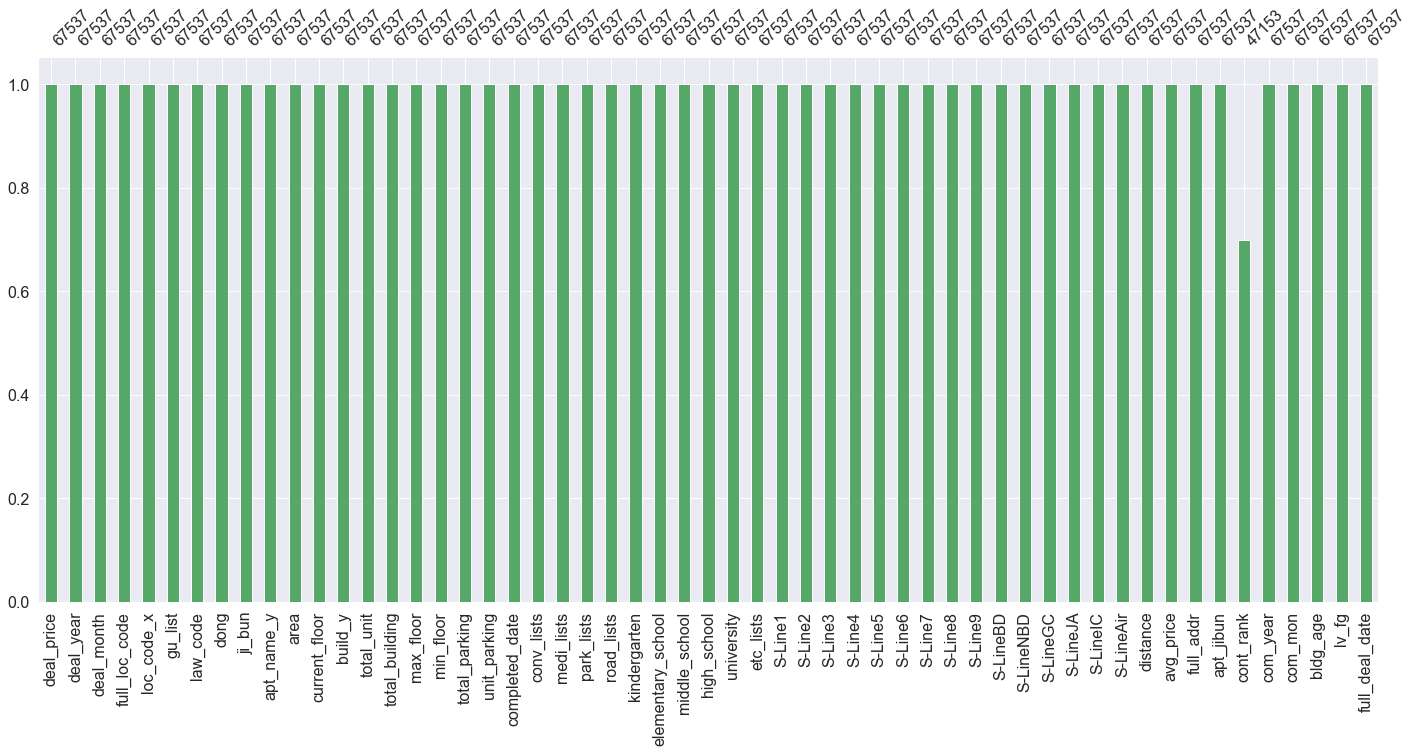

In [75]:
msno.bar(gangnam_data, color='g')

In [78]:
gangnam_data.corr(method='pearson')

,deal_price,deal_year,deal_month,area,current_floor,build_y,total_unit,total_building,max_floor,min_floor,...,S-LineGC,S-LineJA,S-LineIC,S-LineAir,distance,avg_price,cont_rank,com_year,bldg_age,lv_fg
deal_price,1.000000,0.256721,0.024176,0.829776,0.173699,-0.189123,-0.018601,0.009570,0.264505,0.182421,...,NaN,NaN,NaN,NaN,-0.083916,0.570230,-0.224862,-0.184197,0.272169,0.179476
deal_year,0.256721,1.000000,-0.029177,0.112617,0.035592,0.086781,0.014263,0.027184,0.090986,0.040541,...,NaN,NaN,NaN,NaN,-0.009172,0.412404,-0.071385,0.091637,0.280162,0.084261
deal_month,0.024176,-0.029177,1.000000,0.007677,-0.004552,0.025594,-0.009849,-0.006524,-0.003819,0.000967,...,NaN,NaN,NaN,NaN,0.000622,0.033914,-0.002783,0.026163,-0.035974,-0.000686
area,0.829776,0.112617,0.007677,1.000000,0.117872,-0.060405,-0.220142,-0.185330,0.204275,0.083739,...,NaN,NaN,NaN,NaN,-0.009405,0.107204,-0.187776,-0.053825,0.093387,0.153781
current_floor,0.173699,0.035592,-0.004552,0.117872,1.000000,0.246854,-0.018120,-0.131780,0.637922,0.490022,...,NaN,NaN,NaN,NaN,-0.074359,0.068105,-0.100392,0.240870,-0.219085,-0.108919
build_y,-0.189123,0.086781,0.025594,-0.060405,0.246854,1.000000,-0.298048,-0.231339,0.398194,0.118804,...,NaN,NaN,NaN,NaN,0.053808,-0.272877,0.007829,0.978519,-0.911323,0.283835
total_unit,-0.018601,0.014263,-0.009849,-0.220142,-0.018120,-0.298048,1.000000,0.803977,-0.010552,0.060640,...,NaN,NaN,NaN,NaN,-0.114920,0.349923,-0.112238,-0.309226,0.303352,0.003274
total_building,0.009570,0.027184,-0.006524,-0.185330,-0.131780,-0.231339,0.803977,1.000000,-0.161491,-0.178727,...,NaN,NaN,NaN,NaN,-0.046040,0.420885,-0.170423,-0.238764,0.240188,-0.085588
max_floor,0.264505,0.090986,-0.003819,0.204275,0.637922,0.398194,-0.010552,-0.161491,1.000000,0.676173,...,NaN,NaN,NaN,NaN,-0.095070,0.108942,-0.172917,0.390605,-0.343019,0.696038
min_floor,0.182421,0.040541,0.000967,0.083739,0.490022,0.118804,0.060640,-0.178727,0.676173,1.000000,...,NaN,NaN,NaN,NaN,-0.129537,0.092036,-0.088719,0.120524,-0.101247,0.415935


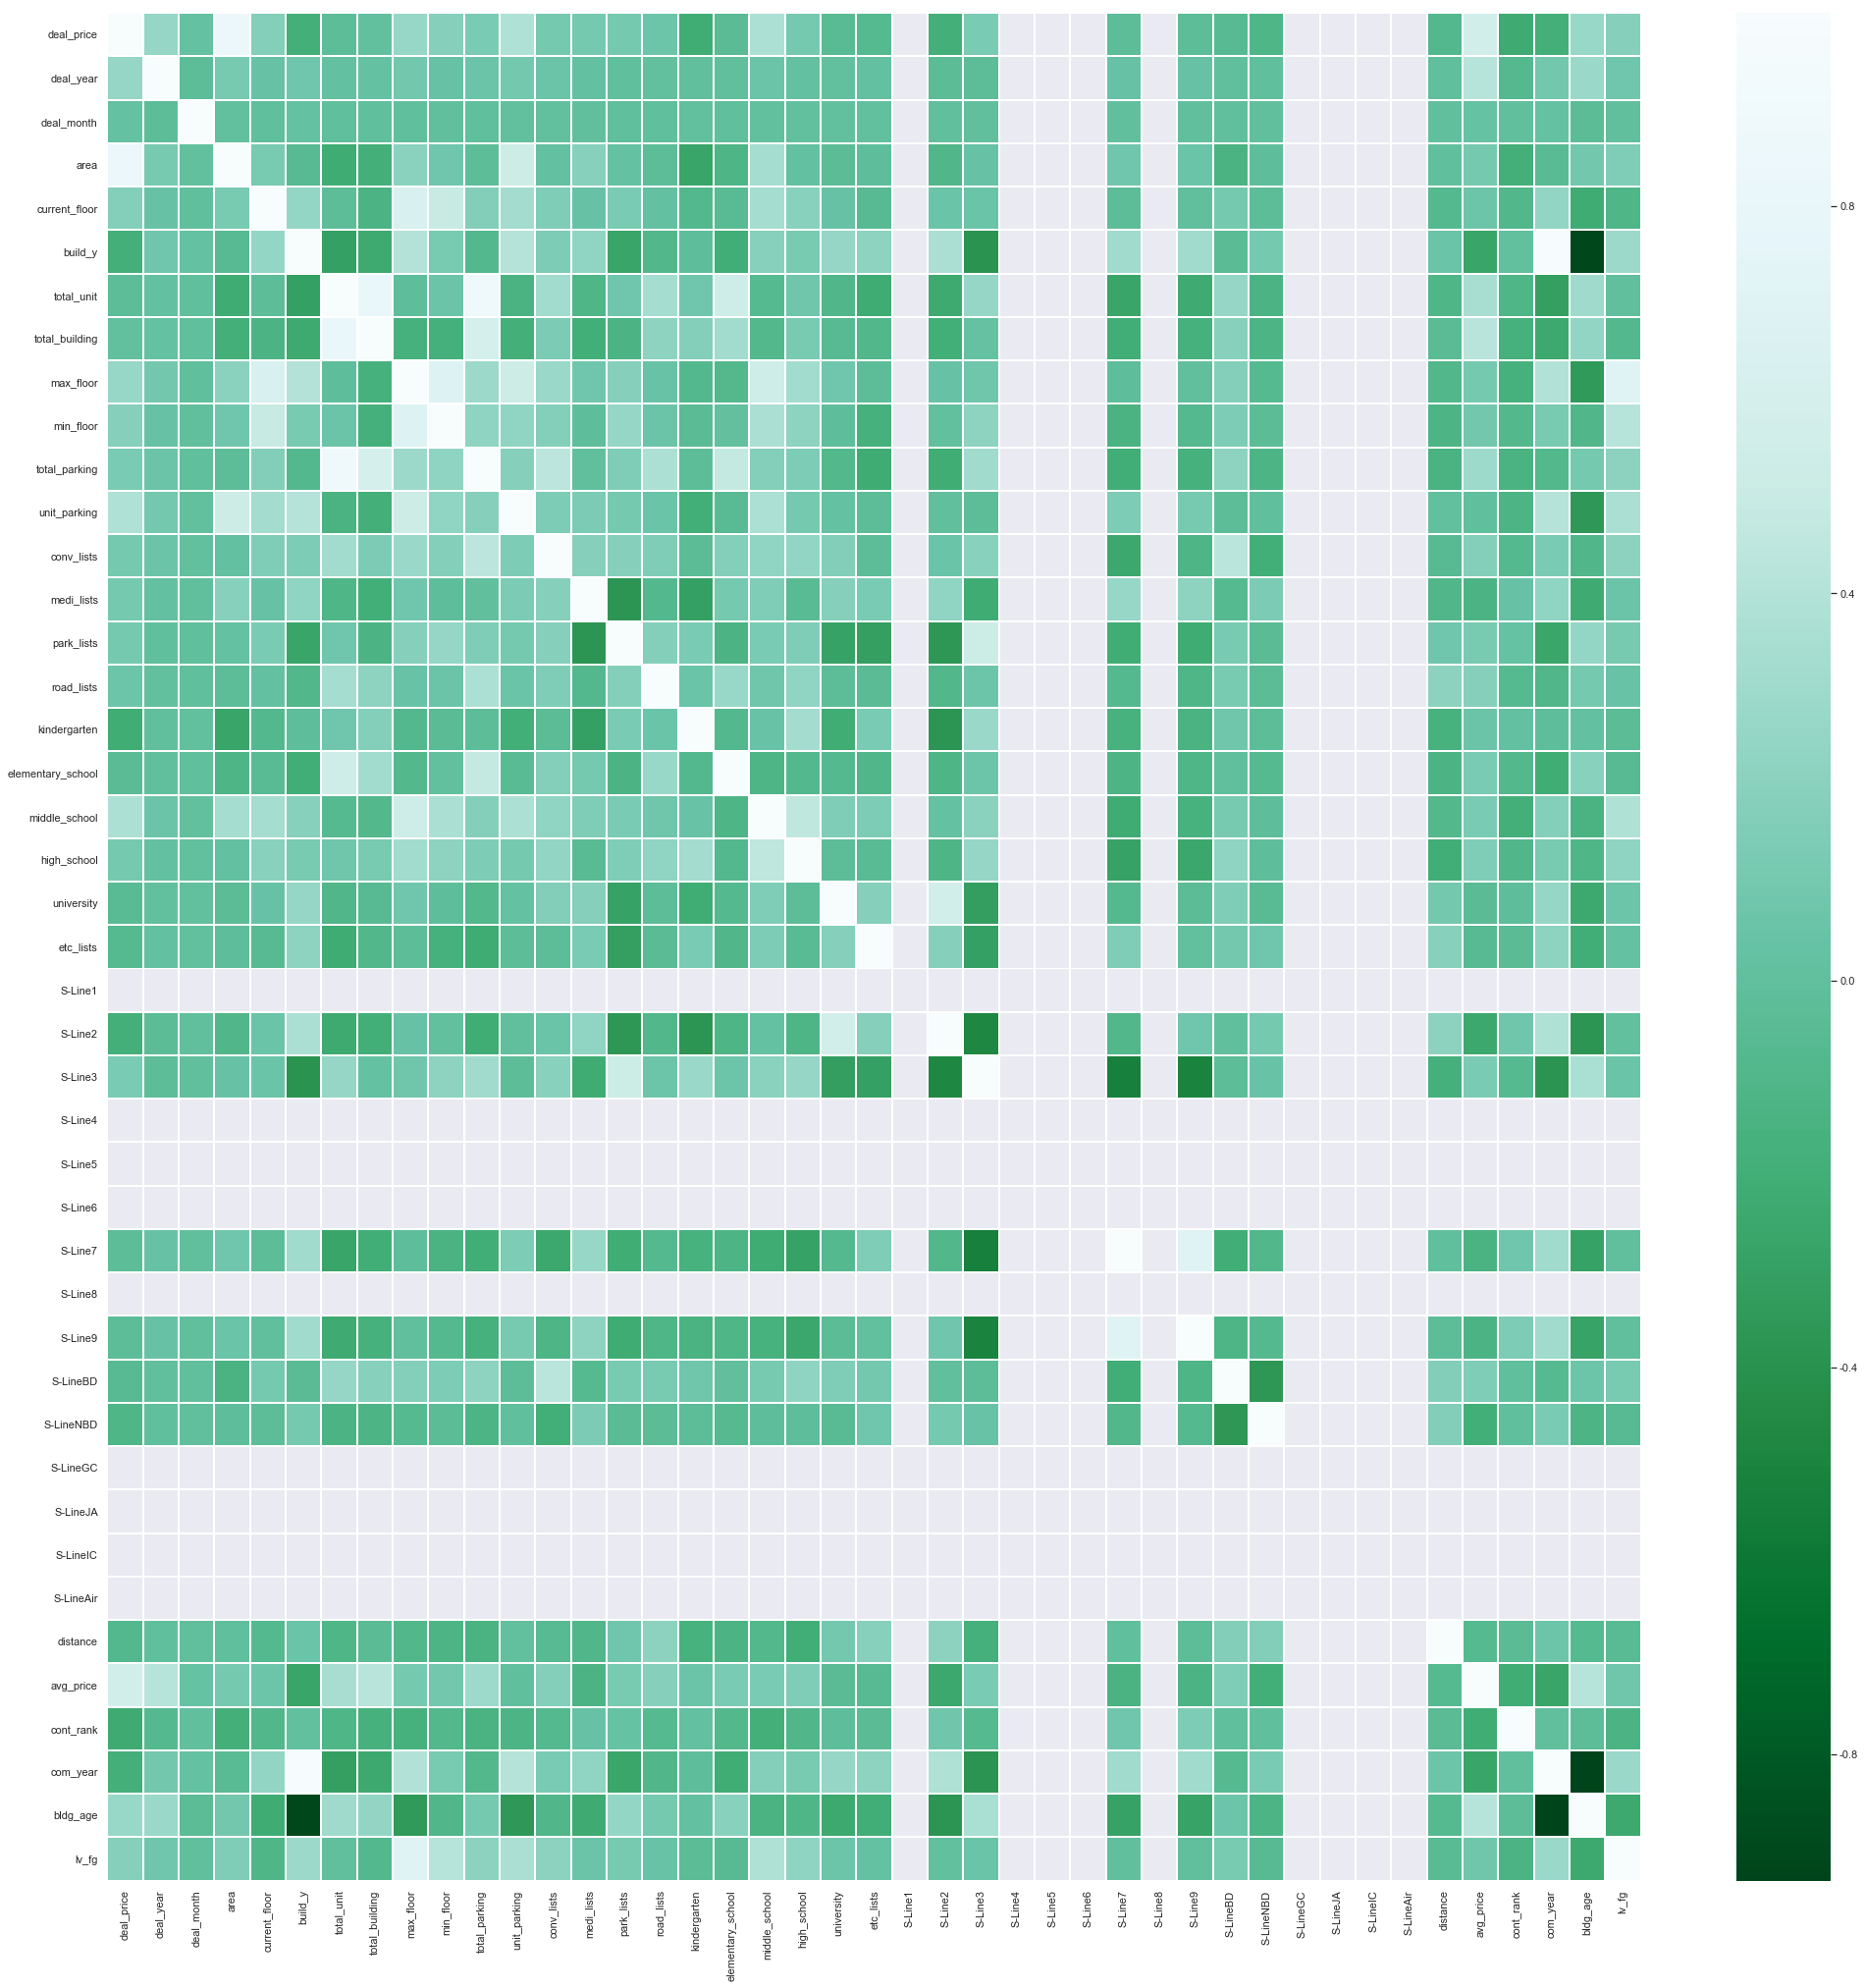

In [77]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=gangnam_data.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='BuGn_r')

### vis sungbuk

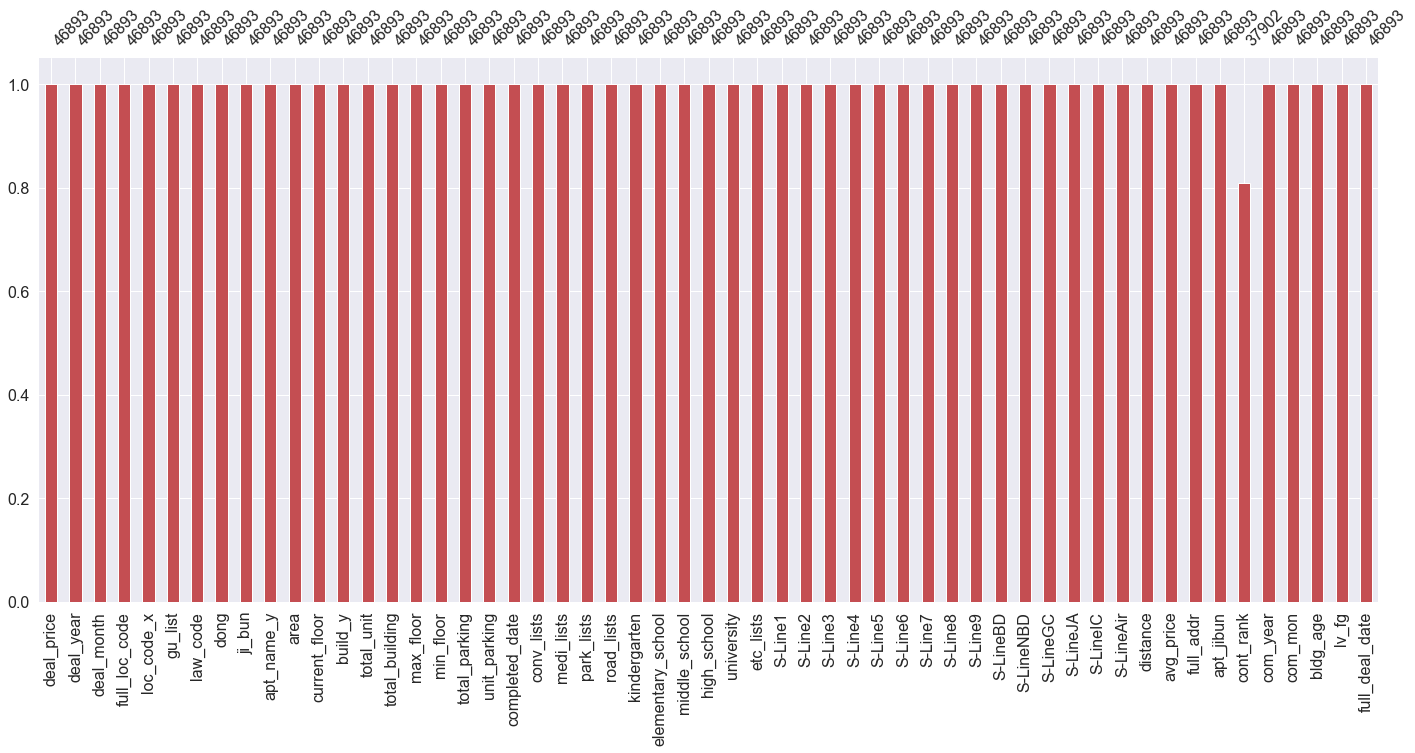

In [65]:
msno.bar(sungbuk_data,color='r')

In [66]:
# Analysis
print('Date range:{} to {}'.format(sungbuk_data['full_deal_date'].min(),sungbuk_data['full_deal_date'].max()))
print('Number of law_name',sungbuk_data['law_code'].nunique())

Date range:2006-01-01 00:00:00 to 2018-10-01 00:00:00
Number of law_name 9


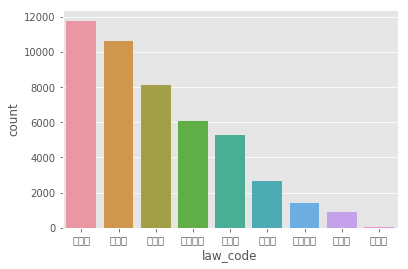

In [32]:
sns.countplot(sungbuk_data.law_code, order = sungbuk_data['law_code'].value_counts().index)

In [ ]:
# fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
# plt.title('법정동별 가격 추이', fontproperties=fontprop)
# plt.xlabel('dong')
# plt.ylabel('House Prices')
# plt.legend()
# sns.barplot(x='law_code', y='deal_price', data = state_ts)

In [67]:
statelist = sungbuk_data['law_code'].unique()
statelist = list(statelist)
print(statelist[:5])

['돈암동', '정릉동', '길음동', '종암동', '하월곡동']


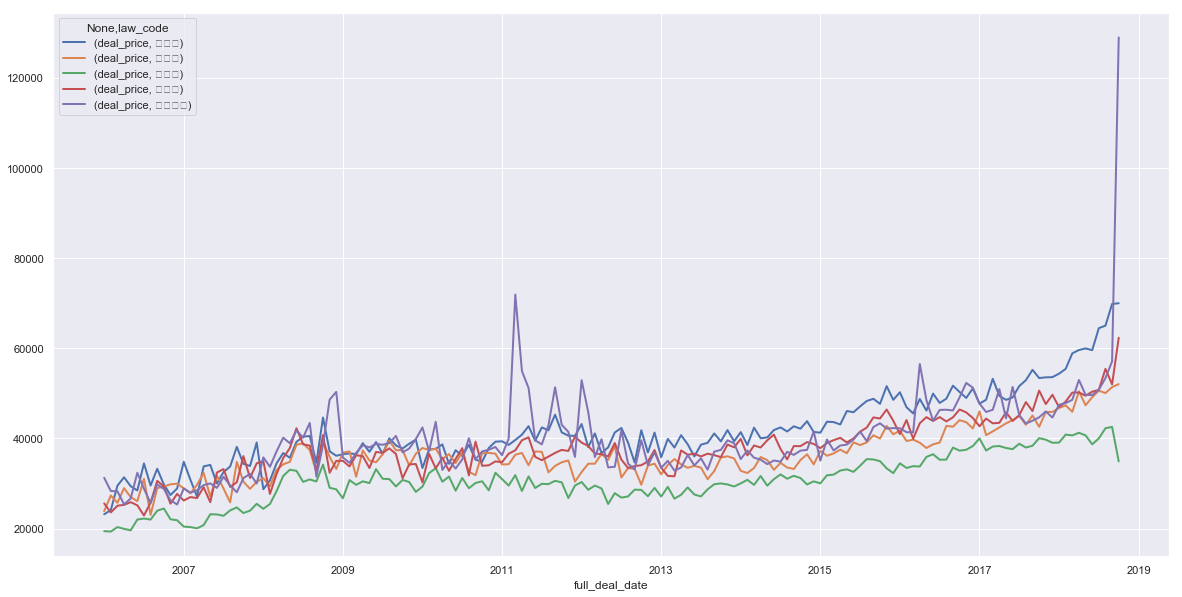

In [68]:
stateseries = pd.DataFrame(sungbuk_data[(sungbuk_data['law_code'].\
    isin(statelist[:5]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(20,10), linewidth=2)
plt.show()

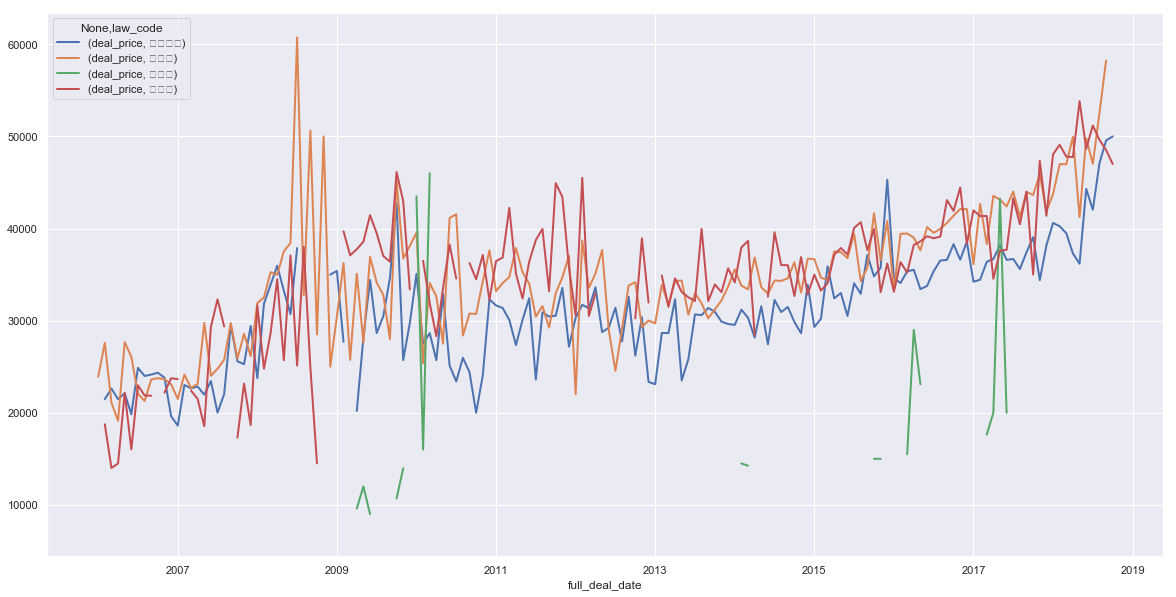

In [69]:
stateseries = pd.DataFrame(sungbuk_data[(sungbuk_data['law_code'].\
    isin(statelist[5:]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(20,10), linewidth=2)
plt.show()

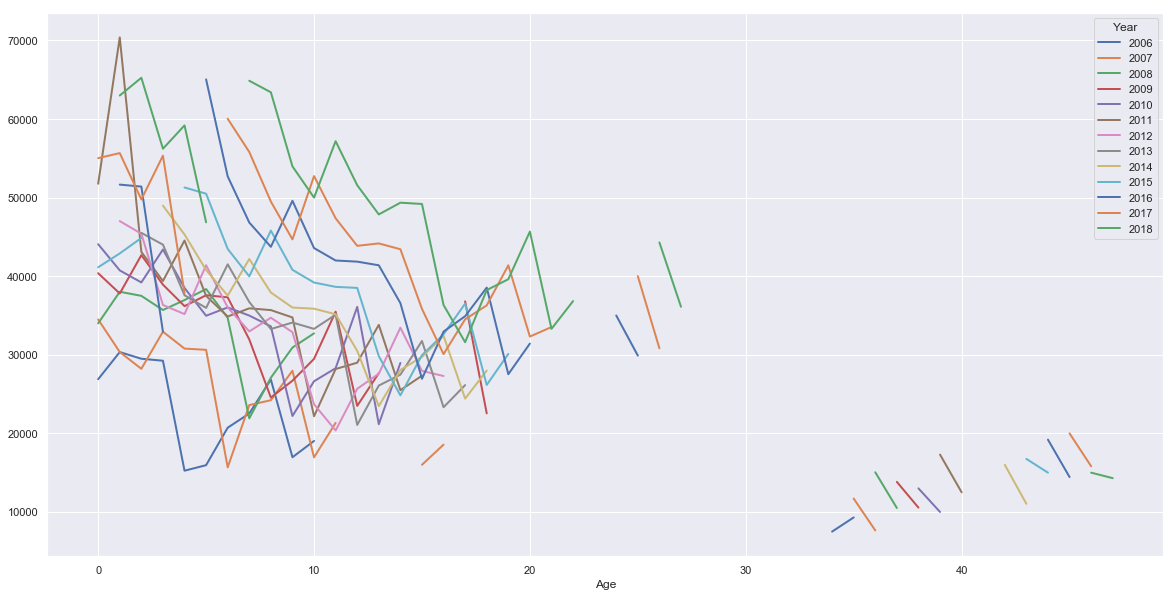

In [70]:
%matplotlib inline
sns.set()
season = sungbuk_data
season['Date'] = sungbuk_data.full_deal_date
season['Year'] = sungbuk_data['full_deal_date'].dt.year
season['Month'] = sungbuk_data['full_deal_date'].dt.month
season['Day'] = sungbuk_data['full_deal_date'].dt.day
season['Age'] = sungbuk_data['bldg_age']
spivot = pd.pivot_table(season, index='Age', columns = 'Year', values = 'deal_price', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=2)
plt.show()

### Corelation and vis

In [71]:
sungbuk_data.corr()

,deal_price,deal_year,deal_month,area,current_floor,build_y,total_unit,total_building,max_floor,min_floor,...,distance,avg_price,cont_rank,com_year,bldg_age,lv_fg,Year,Month,Day,Age
deal_price,1.000000,0.463795,-0.004122,0.672625,0.170350,0.472132,0.014898,0.154886,0.317406,0.183987,...,-0.027732,0.585077,-0.144869,0.472132,-0.094791,0.039275,0.463795,-0.004122,NaN,-0.094791
deal_year,0.463795,1.000000,-0.093483,0.060699,0.013511,0.218229,-0.084549,-0.006220,0.059180,0.046589,...,-0.039420,0.581950,-0.028154,0.218229,0.503608,0.025205,1.000000,-0.093483,NaN,0.503608
deal_month,-0.004122,-0.093483,1.000000,0.015065,0.006764,0.001104,0.010952,0.012282,0.013031,-0.003428,...,0.010039,-0.018415,-0.002945,0.001104,-0.066116,0.001838,-0.093483,1.000000,NaN,-0.066116
area,0.672625,0.060699,0.015065,1.000000,0.086790,0.086702,0.094962,0.023976,0.160651,0.107711,...,0.065880,-0.167872,0.015147,0.086702,-0.034460,0.019321,0.060699,0.015065,NaN,-0.034460
current_floor,0.170350,0.013511,0.006764,0.086790,1.000000,0.050910,0.074944,0.030593,0.300079,0.212124,...,-0.036131,0.114122,-0.050301,0.050910,-0.035655,-0.784874,0.013511,0.006764,NaN,-0.035655
build_y,0.472132,0.218229,0.001104,0.086702,0.050910,1.000000,-0.209199,0.174532,0.193637,0.192386,...,0.062671,0.538389,0.064367,1.000000,-0.733208,0.075903,0.218229,0.001104,NaN,-0.733208
total_unit,0.014898,-0.084549,0.010952,0.094962,0.074944,-0.209199,1.000000,0.750207,0.237788,-0.146685,...,0.261986,-0.055445,0.191070,-0.209199,0.126284,0.081035,-0.084549,0.010952,NaN,0.126284
total_building,0.154886,-0.006220,0.012282,0.023976,0.030593,0.174532,0.750207,1.000000,0.150402,-0.063886,...,0.256816,0.198240,0.208269,0.174532,-0.158842,0.067725,-0.006220,0.012282,NaN,-0.158842
max_floor,0.317406,0.059180,0.013031,0.160651,0.300079,0.193637,0.237788,0.150402,1.000000,0.501061,...,-0.092024,0.222868,-0.110073,0.193637,-0.130184,0.355574,0.059180,0.013031,NaN,-0.130184
min_floor,0.183987,0.046589,-0.003428,0.107711,0.212124,0.192386,-0.146685,-0.063886,0.501061,1.000000,...,-0.170590,0.089422,0.048818,0.192386,-0.137850,0.117646,0.046589,-0.003428,NaN,-0.137850


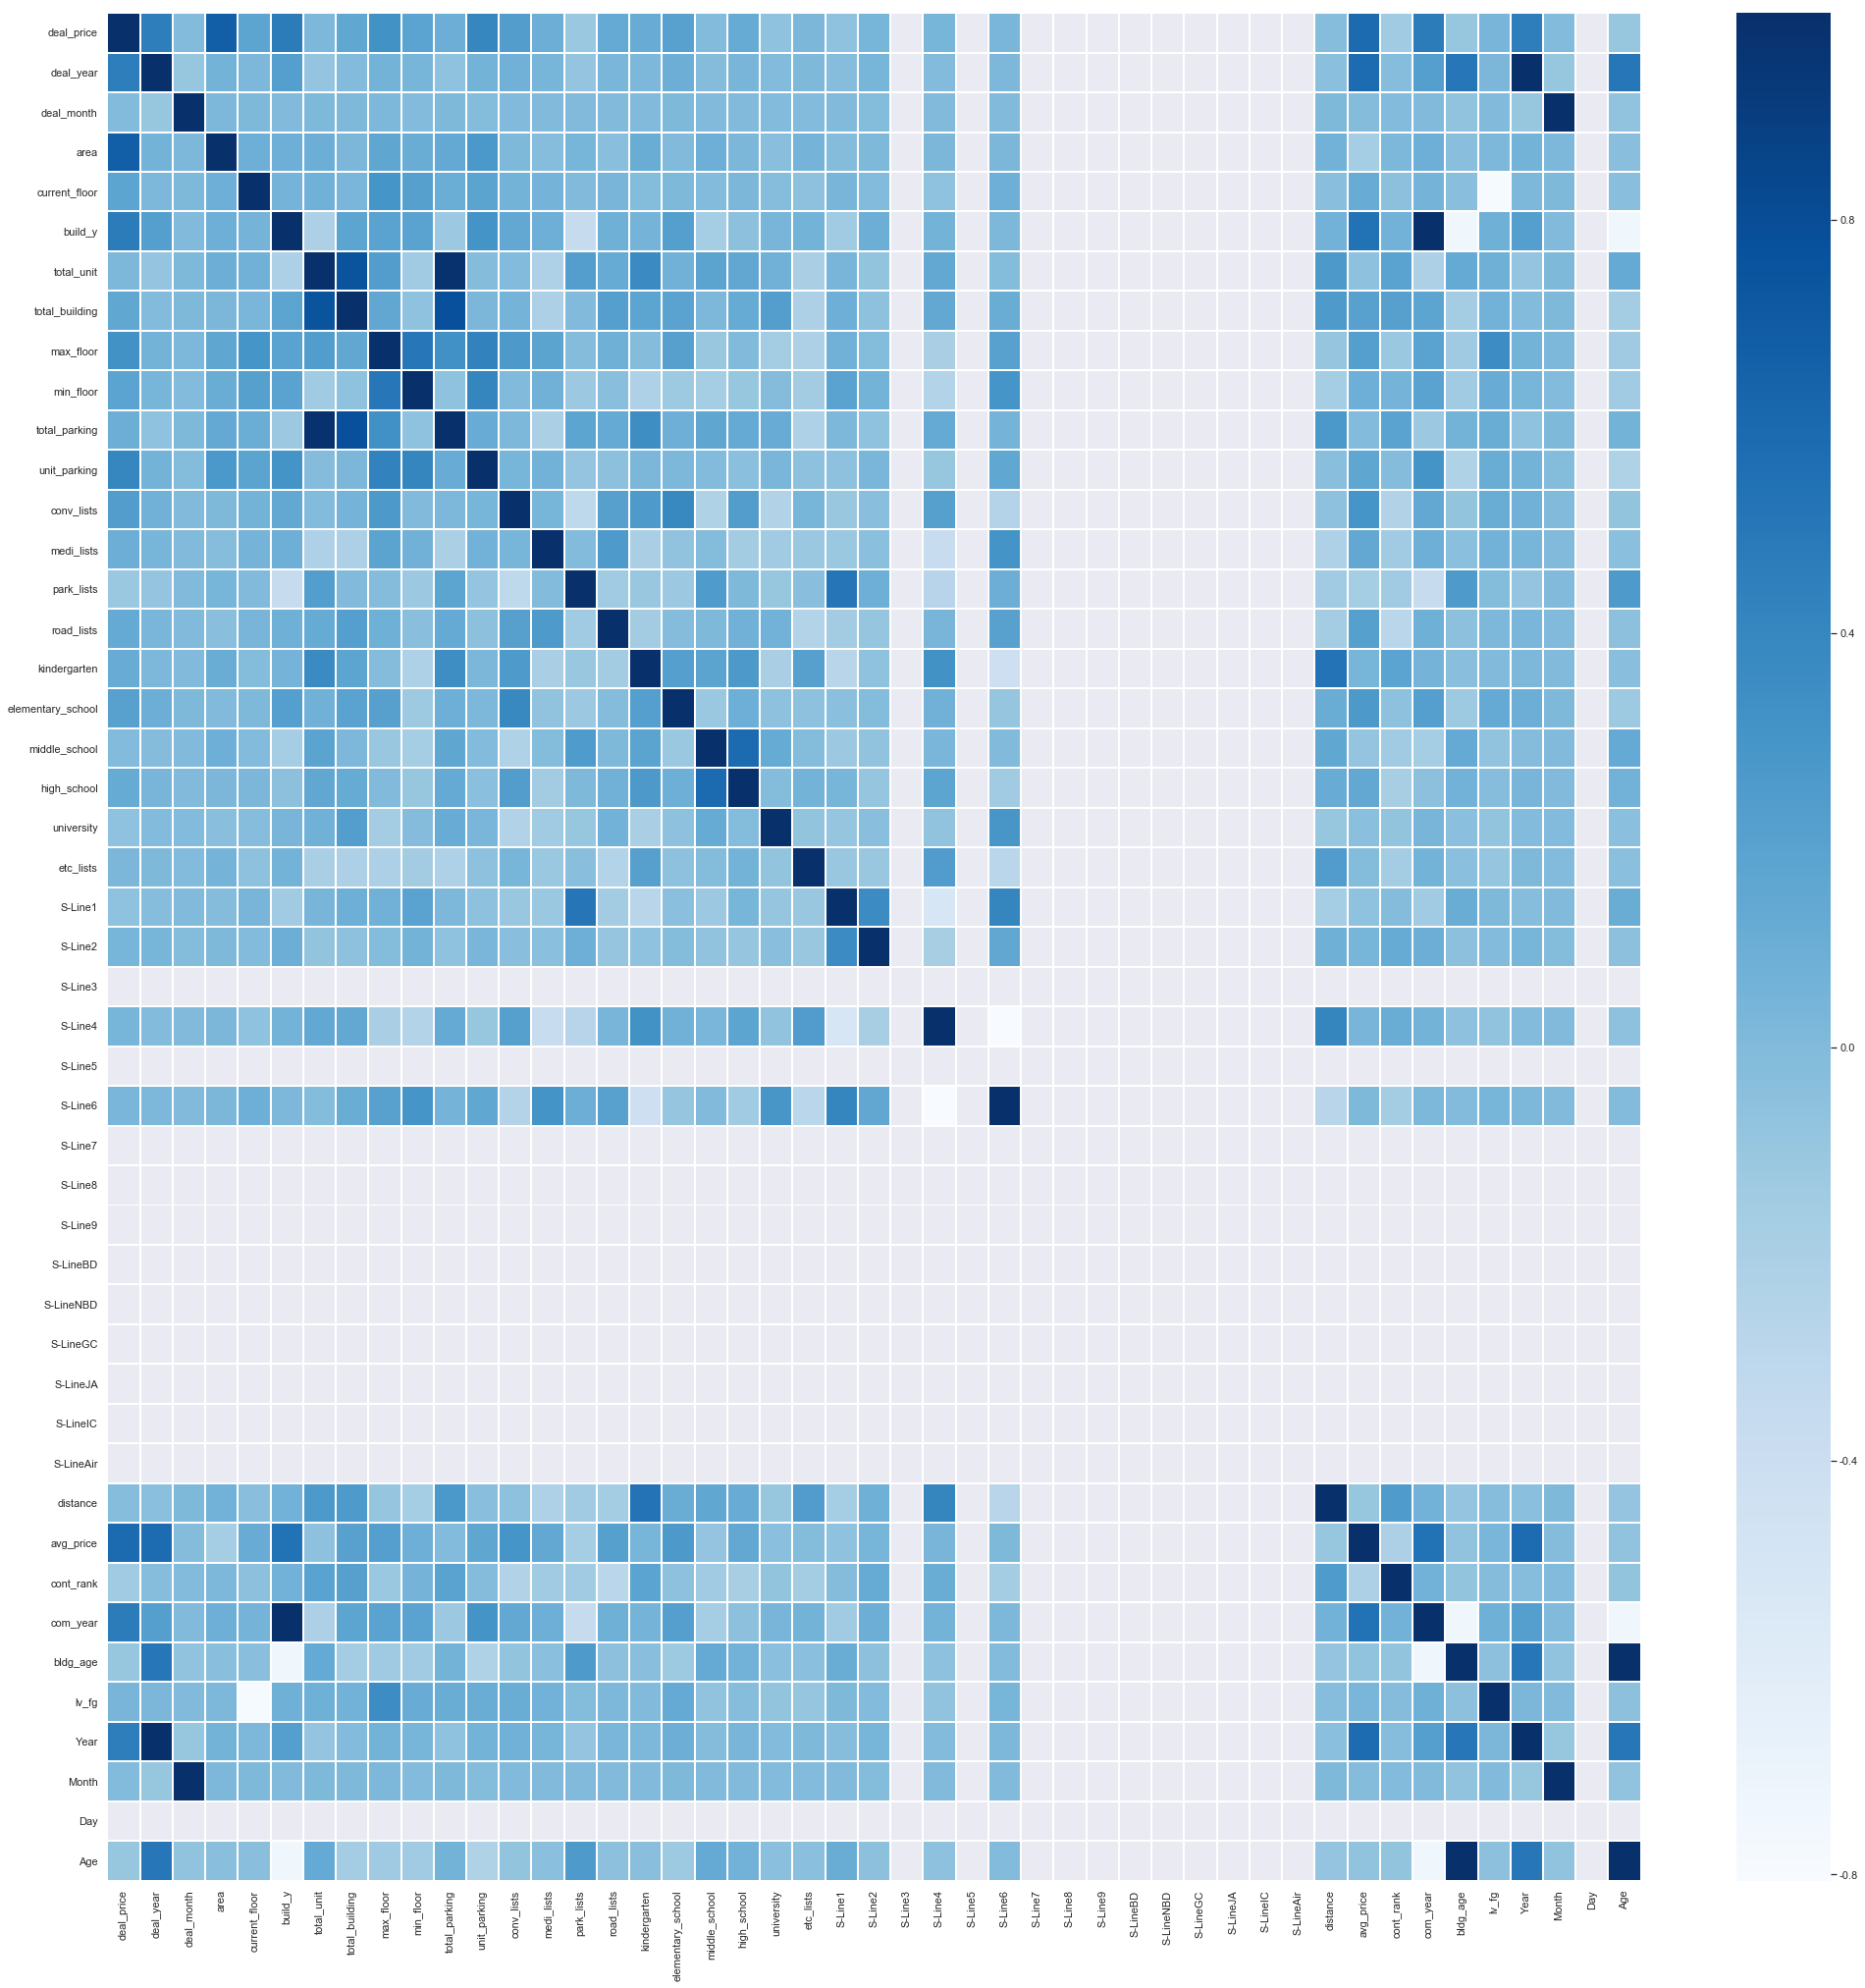

In [72]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=sungbuk_data.corr(method='pearson'), annot=False, fmt='.2f', linewidths='1', cmap='Blues')

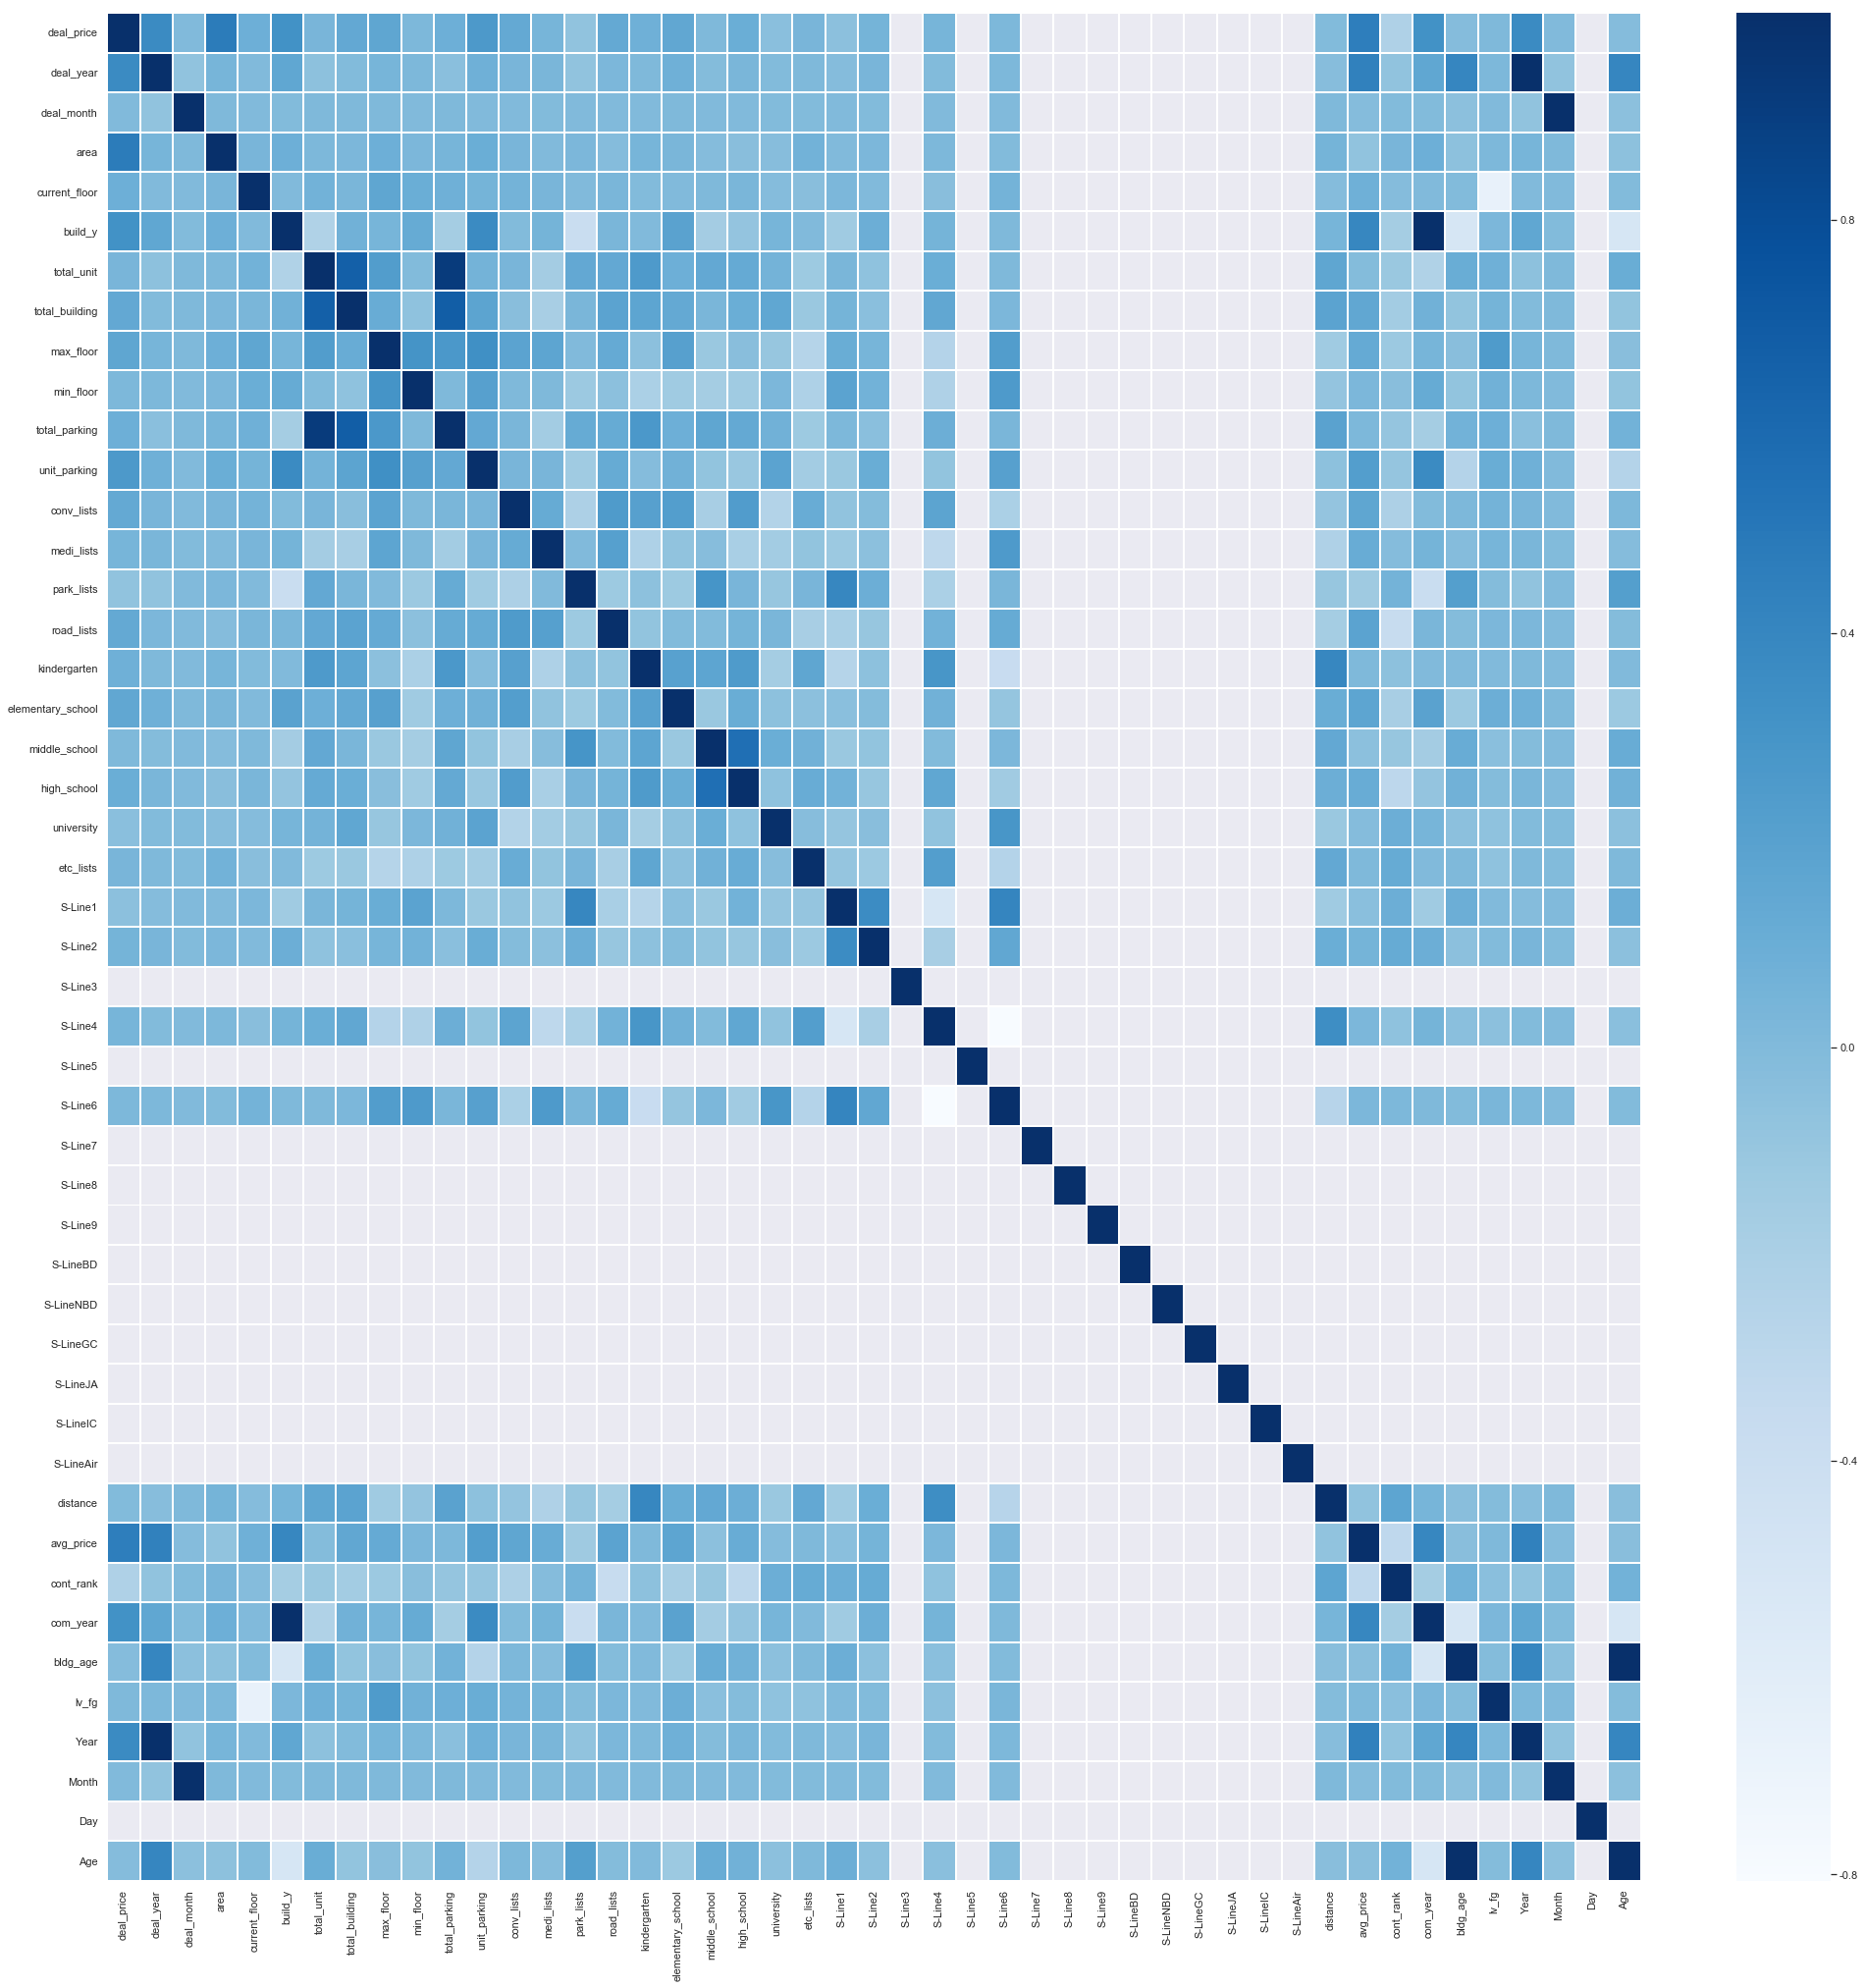

In [73]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=sungbuk_data.corr(method='kendall'), annot=False, fmt='.2f', linewidths='1', cmap='Blues')

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=sungbuk_data.corr(method='spearman'), annot=False, fmt='.2f', linewidths='1', cmap='Blues')